## Type II NLS ##

TE Properties expressed in terms of TE integral $\mathcal{L}_{i}$

$$
    S=\frac{1}{eT} \: \frac{\mathcal{L}_{1}}{\mathcal{L}_{0}} , \tag{1}
$$

$$
    \sigma = e^{2} \mathcal{L}_{0} , \tag{2}
$$

and

$$
    \kappa_{e}=\frac{1}{T} \, \left(\mathcal{L}_{2}-\frac{\mathcal{L}_{1}^{2}}{\mathcal{L}_{0}} \right)  \tag{3}
$$

according to 

$$
    \mathcal{L}_{i} = \int \tau v^{2} \, g(E) \, \left(- \frac{\partial{f}}{\partial{E}} \right) \, (E-\mu)^{i} \quad dE \tag{4}
$$



In [17]:
from numpy import frompyfunc, linspace, sqrt, exp, log, pi, zeros, arange
from mpmath import polylog
from scipy.integrate import quad
from pylab import cm
from matplotlib.ticker import AutoMinorLocator
import scipy.constants as sc 

# Specific treatment for polylogarithm function
plog = frompyfunc(polylog, 2, 1)

# Call plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

# Generate 2 colors from the 'Set1' colormap
colors = mpl.colormaps['tab10'](2)

infty = 100
T = 300 #Temperature in K
kB = sc.physical_constants['Boltzmann constant in eV/K'][0]
kBT = kB*T
hbar = sc.physical_constants['reduced Planck constant in eV s'][0]
c_light = sc.physical_constants['speed of light in vacuum'][0]
m0 = sc.physical_constants['electron mass energy equivalent in MeV'][0]/c_light**2 #MeV/(c**2)
eff_mass1= 0.4*m0*10**(6)
e_charge = sc.physical_constants['atomic unit of charge'][0]
vF1 = 1.89e+05 #Fermi velocity
tau = 10**(-14) #relaxation time in (s)
S_0 = kB*e_charge/e_charge

f = 10 #Conduction 17.40867685
Deltac = 0.01 #Conduction -0.08040215
a = 17 #mexican 17
b = 5000 #5000
#a = 7.2
#b = 690
d = 0.03 #Mexican 0.03
db = d/kBT
Dc = Deltac/kBT
E0 = (a**2)/(4*b*kBT) + db

with

$k_{B} = 8.617333262 \times 10^{-5} \,\, \mathrm{eV} \cdot \mathrm{K}^{-1}$ 

$\hbar = 6.582119569 \times 10^{-16} \,\, \mathrm{eV} \cdot \mathrm{s}$

$e = 1.602176634 \times 10^{-19} \,\, \mathrm{C}$

$m_{0} = 0.51099895 \,\, \mathrm{MeV}/\mathrm{c}^{2} $

In [18]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import sys

#This function extracts the high symmetry points from the output of bandx.out
def Symmetries(fstring): 
  f = open(fstring,'r')
  x = np.zeros(0)
  for i in f:
    if "high-symmetry" in i:
      x = np.append(x,float(i.split()[-1]))
  f.close()
  return x
# This function takes in the datafile, the fermi energy, the symmetry file, a subplot, and the label
# It then extracts the band data, and plots the bands, the fermi energy in red, and the high symmetry points
def bndplot(datafile,fermi,symmetryfile,subplot,**kwargs):
  ## necessary:
  # datafile is the bands.dat.gnu file generated from band.x
  # fermi is the Fermi energy
  # symmetryfile is the standard output file of band.x (bands.pp.out)
  # subplot is the axes that you want to plot the band on

  ## optional:
  # use name_k_points=['L','G','X','U','G'] where G is Gamma point to label the high symmetry points. It must have the same length as the variable 'temp'
  # use shift_fermi=1 to shift the Fermi energy to zero
  # use color='black' to manually set the color of the band structure plot. Useful to plot two band structure together for comparison
  # use linestyle='dashed' to manually set the linestyle of the band structure plot. Useful to plot two band structure together for comparison
  # use range=[-5,5] to set the energy range for plotting the band structure
  # use legend='Si, PBE' to set the legend of the bands

  if 'shift_fermi' in kwargs:
    bool_shift_efermi = kwargs['shift_fermi']
  else:
    bool_shift_efermi = 0
  if 'color' in kwargs:
    color_bnd=kwargs['color']
  else:
    color_bnd='black'
  if 'linestyle' in kwargs:
    line_bnd=kwargs['linestyle']
  else:
    line_bnd='solid'
  
  z = np.loadtxt(datafile) #This loads the bandx.dat.gnu file
  x = np.unique(z[:,0]) #This is all the unique x-points
  bands = []
  bndl = len(z[z[:,0]==x[1]]) #This gives the number of bands in the calculation
  Fermi = float(fermi)
  if bool_shift_efermi:
    fermi_shift=Fermi
  else:
    fermi_shift=0
  axis = [min(x),max(x)]
  for i in range(0,bndl):
    bands.append(np.zeros([len(x),2])) #This is where we storre the bands
  for i in range(0,len(x)):
    sel = z[z[:,0] == x[i]]  #Here is the energies for a given x
    test = []
    for j in range(0,bndl): #This separates it out into a single band
      bands[j][i][0] = x[i]
      #bands[j][i][1] = np.multiply(sel[j][1],13.605698066)
      bands[j][i][1] = sel[j][1]
  for i in bands: #Here we plots the bands
    subplot.plot(i[:,0],i[:,1]-fermi_shift,color=color_bnd,linestyle=line_bnd)
  if 'legend' in kwargs:
    #empty plot to generate legend
    subplot.plot([None],[None],color=color_bnd,linestyle=line_bnd,label=kwargs['legend'])
  temp = Symmetries(symmetryfile)
  for j in temp: #This is the high symmetry lines
    x1 = [j,j]
    #x2 = [fermi-10,fermi+10]
    #subplot.plot(x1,x2,'--',lw=0.55,color='black',alpha=0.75)
    subplot.axvline(x=j,linestyle='solid',color='gray',alpha=0.5)
  subplot.plot([min(x),max(x)],[Fermi-fermi_shift,Fermi-fermi_shift],color='red',linestyle='dotted')
  subplot.set_xticks(temp)
  subplot.set_xticklabels([])
  if 'name_k_points' in kwargs:
    if len(kwargs['name_k_points'])==len(temp):
      subplot.set_xticklabels(kwargs['name_k_points'])
  if 'range' in kwargs:
    range_plot=kwargs['range']
    subplot.set_ylim([range_plot[0],range_plot[1]])
  subplot.set_xlim([axis[0],axis[1]])
  subplot.set_xlabel('k')
  subplot.set_ylabel('energy (eV)')
  if 'legend' in kwargs:
    subplot.legend()
  return bands

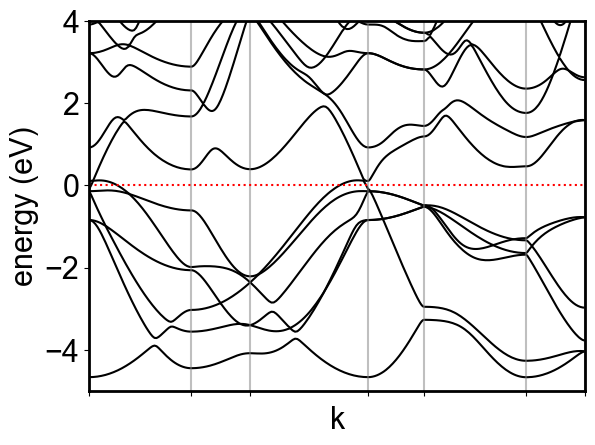

In [19]:
datafile='bands/Mg3Bi2.bands.gnu'
fermi = 7.3
#fermi = 7.5
symmetryfile='bands/Mg3Bi2.bands.out'
bool_shift_efermi= True
fig, ax = plt.subplots()

#bndplot(datafile,fermi,symmetryfile,ax)
band = bndplot(datafile,fermi,symmetryfile,ax,shift_fermi=bool_shift_efermi,color='black',linestyle='solid',range=[-5,4])

kc = band[30][:,0]
Ekc = band[30][:,1]
kv = band[29][:,0]
Ekv = band[29][:,1]

kvv = np.append(kv[100:150]-1.574,kv[0:50])
Ekvv = np.append(Ekv[100:150],Ekv[0:50])
kcc = np.append(kc[100:150]-1.574,kc[0:50])
Ekcc = np.append(Ekc[100:150],Ekc[0:50])

sigma0c = 670.9939043693811  S/m
sigma0v = 4757.8702581217685  S/m
kappa0c = 0.0014948086676394648 W/m.k
kappa0v = 0.005299679814549578 W/m.k


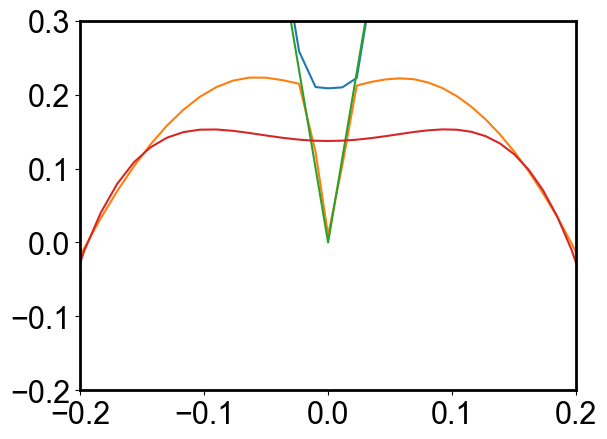

In [20]:
plt.plot(kcc,Ekcc-7.2)
plt.plot(kvv,Ekvv-7.2)
plt.xlim([-0.2,0.2])
plt.ylim([-0.2,0.3])
#plt.axvline(x=0)

v = 9.95
v1 = 8.00 
v2 = 11.90
fc = v*np.abs(kcc)
fc1 = v1*np.abs(kcc)
fc2 = v2*np.abs(kcc)
plt.plot(kcc,fc)

a = 5.5
b = 490
#a = 17
#b = 5000

mm  = 0.145
mm1 = 0.100
mm2 = 0.190
a = 1/(2*mm)
a1 = 1/(2*mm1)
a2 = 1/(2*mm2)
ee1 = 0.61*kBT
fv = -(kcc**2/(4*mm)-ee1)**2/ee1
fv1 = -(kcc**2/(4*mm1)-ee1)**2/ee1 
fv2 = -(kcc**2/(4*mm2)-ee1)**2/ee1 
#fv = a*kcc**2 - b*kcc**4
plt.plot(kcc,fv+0.153)
#plt.plot(kcc,fv+0.135)
#plt.figure()
#plt.plot(kcc,Ekcc-fc-7.4)
#plt.ylim([-0.2,0.2])
#plt.xlim([-0.3,0.3])

#Calculation

#Sigma0c
def Sigma0c(vF):
    frac1c= tau*e_charge**2*kBT**2
    frac2c= 3*pi**2*hbar**3*vF
    sigma0c=frac1c/(frac2c*e_charge)
    return sigma0c

print('sigma0c =',Sigma0c(vF1), ' S/m')

#Sigma0v
def Sigma0v(eff_mass):
    frac1v = 4*tau*e_charge**2*kBT/(3*pi**2*hbar**2)
    frac2v = eff_mass*kBT/(hbar**2)
    rootv  = np.sqrt(frac2v)
    sigma0v = frac1v*rootv/e_charge
    return sigma0v

print('sigma0v =',Sigma0v(eff_mass1), ' S/m')

#Sigma for parameter
sigma0= Sigma0v(eff_mass1)

#Kappa0c
def Kappa0c(vF):
    kappa0c = tau*kB**4*T**3/(3*pi**2*hbar**3*vF)*e_charge
    return kappa0c

print('kappa0c =',Kappa0c(vF1),'W/m.k')

#Kappa0v
def Kappa0v(eff_mass):
    fracv = eff_mass*kBT/(hbar**2)
    rootv  = np.sqrt(fracv)
    kappa0v = 2*tau*kB**3*T**2/(3*pi**2*hbar**2)*rootv*e_charge
    return kappa0v

print('kappa0v =',Kappa0v(eff_mass1),'W/m.k')
kappa0=Kappa0v(eff_mass1)

## Two-Band Model ##

Conduction band contribution:
$$
    \mathcal{L}_{c,i} = \frac{(k_{B}T)^{i+2}}{3\pi^{2}\hbar^{3}v_{F}} \int_{0}^{\infty} \tau (x+\eta)^{2} \: x^{i} \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{5}
$$

Valence band contribution:
 - Outer ring
    $$
        \mathcal{L}_{v,i}^{out} = \frac{4(k_{B}T)^{i+3/2}\sqrt{m}}{3 \pi^{2} \hbar^{3}} \, \int_{-\infty}^{\varepsilon_{0}-\eta} \, \tau \varepsilon_{1} \sqrt{\varepsilon_{0}-x-\eta} \: \left(1+\sqrt{(\varepsilon_{0}-x-\eta)/\varepsilon_{1}}\right)^{3/2} \: x^{i} \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{6}
    $$

- Inner ring

    $$
        \mathcal{L}_{v,i}^{in} = \frac{4(k_{B}T)^{i+3/2}\sqrt{m}}{3 \pi^{2} \hbar^{3}} \, \int_{\varepsilon_{0}-\varepsilon_{1}-\eta}^{\varepsilon_{0}-\eta} \, \tau \varepsilon_{1} \sqrt{\varepsilon_{0}-x-\eta} \: \left(1-\sqrt{(\varepsilon_{0}-x-\eta)/\varepsilon_{1}}\right)^{3/2} \: x^{i} \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{7}
    $$


**TE integral vonduction band contribution:**

$$
    \mathcal{L}_{c,0} = \frac{(k_{B}T)^{2}}{3\pi^{2}\hbar^{3}v_{F}} \int_{-\eta}^{\infty} \tau (x+\eta)^{2} \:  \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{7}
$$

$$
    \mathcal{L}_{c,1} = \frac{(k_{B}T)^{3}}{3\pi^{2}\hbar^{3}v_{F}} \int_{-\eta}^{\infty} \tau (x+\eta)^{2} \: x \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{8}
$$

$$
    \mathcal{L}_{c,2} = \frac{(k_{B}T)^{4}}{3\pi^{2}\hbar^{3}v_{F}} \int_{-\eta}^{\infty} \tau (x+\eta)^{2} \: x^{2} \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{9}
$$

**TE integral valence band contribution:**
- Outer ring

    $$
        \mathcal{L}_{v,0}^{out} = \frac{4(k_{B}T)^{3/2}\sqrt{m}}{3 \pi^{2} \hbar^{3}} \, \int_{-\infty}^{\varepsilon_{0}-\eta} \, \tau \varepsilon_{1} \sqrt{\varepsilon_{0}-x-\eta} \: \left(1+\sqrt{(\varepsilon_{0}-x-\eta)/\varepsilon_{1}}\right)^{3/2} \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{10}
    $$

    $$
        \mathcal{L}_{v,1}^{out} = \frac{4(k_{B}T)^{5/2}\sqrt{m}}{3 \pi^{2} \hbar^{3}} \, \int_{-\infty}^{\varepsilon_{0}-\eta} \, \tau \varepsilon_{1} \sqrt{\varepsilon_{0}-x-\eta} \: \left(1+\sqrt{(\varepsilon_{0}-x-\eta)/\varepsilon_{1}}\right)^{3/2} \: x \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{11}
    $$

    $$
        \mathcal{L}_{v,2}^{out} = \frac{4(k_{B}T)^{7/2}\sqrt{m}}{3 \pi^{2} \hbar^{3}} \, \int_{-\infty}^{\varepsilon_{0}-\eta} \, \tau \varepsilon_{1} \sqrt{\varepsilon_{0}-x-\eta} \: \left(1+\sqrt{(\varepsilon_{0}-x-\eta)/\varepsilon_{1}}\right)^{3/2} \: x^{2} \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{12}
    $$

- Inner ring

    $$
        \mathcal{L}_{v,0}^{in} = \frac{4(k_{B}T)^{3/2}\sqrt{m}}{3 \pi^{2} \hbar^{3}} \, \int_{\varepsilon_{0}-\varepsilon_{1}-\eta}^{\varepsilon_{0}-\eta} \, \tau \varepsilon_{1} \sqrt{\varepsilon_{0}-x-\eta} \: \left(1-\sqrt{(\varepsilon_{0}-x-\eta)/\varepsilon_{1}}\right)^{3/2} \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{13}
    $$

    $$
        \mathcal{L}_{v,1}^{in} = \frac{4(k_{B}T)^{5/2}\sqrt{m}}{3 \pi^{2} \hbar^{3}} \, \int_{\varepsilon_{0}-\varepsilon_{1}-\eta}^{\varepsilon_{0}-\eta} \, \tau \varepsilon_{1} \sqrt{\varepsilon_{0}-x-\eta} \: \left(1-\sqrt{(\varepsilon_{0}-x-\eta)/\varepsilon_{1}}\right)^{3/2} \: x \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{14}
    $$

    $$
        \mathcal{L}_{v,2}^{in} = \frac{4(k_{B}T)^{7/2}\sqrt{m}}{3 \pi^{2} \hbar^{3}} \, \int_{\varepsilon_{0}-\varepsilon_{1}-\eta}^{\varepsilon_{0}-\eta} \, \tau \varepsilon_{1} \sqrt{\varepsilon_{0}-x-\eta} \: \left(1-\sqrt{(\varepsilon_{0}-x-\eta)/\varepsilon_{1}}\right)^{3/2} \: x^{2} \, \frac{e^{x}}{(e^{x}+1)^{2}} \quad dx \tag{15}
    $$

**By applying two-band model we obtain**

$$
    S = \frac{S_{c} \sigma_{c}+S_{v} \sigma_{v}}{\sigma_{c}+{\sigma_{v}}} \tag{16}
$$

$$
    \sigma = \sigma_{c} + \sigma_{v} \tag{17}
$$


$$
   \kappa = \kappa_{e,c}+\kappa_{e,v}+\frac{\sigma_{c} \sigma_{v}}{\sigma_{c}+\sigma{v}}(S_{c}-S_{v})^{2} \tag{18}
$$

In [21]:
def L0c(xx,E0,E1):
    def integrand1(x,xx):
        return  (x+xx)**2*(exp(x) / (exp(x)+1)**2)
    I1, error = quad(integrand1, -xx, infty, args=(xx))
    return (I1)

def L1c(xx,E0,E1):
    def integrand1(x,xx):
        return  (x+xx)**2*(exp(x) / (exp(x)+1)**2)*x
    I1, error = quad(integrand1, -xx, infty, args=(xx))
    return (I1)

def L2c(xx,E0,E1):
    def integrand1(x,xx):
        return  (x+xx)**2*(exp(x) / (exp(x)+1)**2)*(x**2)
    I1, error = quad(integrand1, -xx, infty, args=(xx))
    return (I1)

def L0vout(xx,E0,E1):
    def integrand1(x,xx):
        return  E1*sqrt(E0-x-xx)*(1+sqrt((E0-x-xx)/E1))**(3/2)*(exp(x) / (exp(x)+1)**2)
    I1, error = quad(integrand1, -infty, E0-xx, args=(xx))
    return (I1)

def L1vout(xx,E0,E1):
    def integrand1(x,xx):
        return  E1*sqrt(E0-x-xx)*(1+sqrt((E0-x-xx)/E1))**(3/2)*x*(exp(x) / (exp(x)+1)**2)
    I1, error = quad(integrand1, -infty, E0-xx, args=(xx))
    return (I1)

def L2vout(xx,E0,E1):
    def integrand1(x,xx):
        return  E1*sqrt(E0-x-xx)*(1+sqrt((E0-x-xx)/E1))**(3/2)*x**2*(exp(x) / (exp(x)+1)**2)
    I1, error = quad(integrand1, -infty, E0-xx, args=(xx))
    return (I1)

def L0vin(xx,E0,E1):
    def integrand3(x,xx):
        return E1*sqrt(E0-x-xx)*(1-sqrt((E0-x-xx)/E1))**(3/2)*(exp(x) / (exp(x)+1)**2)
    I3,error = quad(integrand3, E0-E1-xx, E0-xx, args=(xx))
    return (I3)

def L1vin(xx,E0,E1):
    def integrand3(x,xx):
        return x*E1*sqrt(E0-x-xx)*(1-sqrt((E0-x-xx)/E1))**(3/2)*(exp(x) / (exp(x)+1)**2)
    I3,error = quad(integrand3, E0-E1-xx, E0-xx, args=(xx))
    return (I3)

def L2vin(xx,E0,E1):
    def integrand3(x,xx):
        return x**2*E1*sqrt(E0-x-xx)*(1-sqrt((E0-x-xx)/E1))**(3/2)*(exp(x) / (exp(x)+1)**2)
    I3,error = quad(integrand3, E0-E1-xx, E0-xx, args=(xx))
    return (I3)

def S_c(x,W1,W2):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1c(x[i],W1,W2)/L0c(x[i],W1,W2)
    return sc*S_0

def sigma_c(x,W1,W2,vF):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0c(x[i],W1,W2)
    return sgm*Sigma0c(vF)

def kappa_c(x,W1,W2,vF):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2c(x[i],W1,W2)-(L1c(x[i],W1,W2)**2/L0c(x[i],W1,W2)))
    return kpp*Kappa0c(vF)

def S_v(x,W1,W2):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -(L1vin(x[i],W1,W2)+L1vout(x[i],W1,W2))/(L0vin(x[i],W1,W2)+L0vout(x[i],W1,W2))
    return sc*S_0

def sigma_v(x,W1,W2,eff_mass):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0vin(x[i],W1,W2)+L0vout(x[i],W1,W2)
    return sgm*Sigma0v(eff_mass)

def kappa_v(x,W1,W2,eff_mass):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = L2vin(x[i],W1,W2)+L2vout(x[i],W1,W2)-((L1vin(x[i],W1,W2)+L1vout(x[i],W1,W2))**2/(L0vin(x[i],W1,W2)+L0vout(x[i],W1,W2)))
    return kpp*Kappa0v(eff_mass)

def sigma(x,W1,W2,vF,eff_mass):
    return sigma_c(x,W1,W2,vF)+sigma_v(x,W1,W2,eff_mass)

def S(x,W1,W2,vF,eff_mass):
    return (sigma_c(x,W1,W2,vF)*S_c(x,W1,W2)+sigma_v(x,W1,W2,eff_mass)
            *S_v(x,W1,W2))/sigma(x,W1,W2,vF,eff_mass)

def kappa(x,W1,W2,vF,eff_mass):
    return kappa_c(x,W1,W2,vF)+kappa_v(x,W1,W2,eff_mass)+(sigma_c(x,W1,W2,vF)*sigma_v(x,W1,W2,eff_mass)
                    *(S_c(x,W1,W2)-S_v(x,W1,W2))**2)/sigma(x,W1,W2,vF,eff_mass)*T

def PF(x,W1,W2,vF,eff_mass):
    return S(x,W1,W2,vF, eff_mass)**2*sigma(x,W1,W2,vF,eff_mass)

def ZT(x,W1,W2,vF,eff_mass):
    return PF(x,W1,W2,vF,eff_mass)/kappa(x,W1,W2,vF,eff_mass)
    

 Reference electrical Conductivity $\sigma_{0}$ for each band can be defined as 

\begin{equation*}
    \sigma_{0,c} = \frac{\tau e^{2} (k_{B}T)^{2}}{3 \pi^{2} \hbar^{3} v_{F}} \: ,
\end{equation*}
for conduction band $c$, and
\begin{equation*}
    \sigma_{0,v} = \frac{4 \tau e^{2} (k_{B}T)}{3 \pi^{2}\hbar^{3}} \, \sqrt{\frac{ m k_{B}T}{\hbar^{2}}} \: ,
\end{equation*}
for valence band $v$.

Note that, the unit we use here for $\sigma_{0,c}$ and $\sigma_{0,v}$ calculations are in $\mathrm{S}/\mathrm{m}$

Reference thermal coductivity $\kappa_{0}$ for each band can be defined as

\begin{equation*}
    \kappa_{0,c} = \frac{\tau k_{B}^{4}T^{3}}{3 \pi^{2} \hbar^{3} v_{F}} \: ,
\end{equation*}
for conduction band, and
\begin{equation*}
    \kappa_{0,v} = \frac{4 \tau k_{B}^{7/2} T^{5/2} \sqrt{m}}{3 \pi^{2} \hbar^{3}} \:,
\end{equation*}
for valence band.

Note that, the unit we use here for $\kappa_{0,c}$ and $\kappa_{0,v}$ calculations are in $\mathrm{W}/\mathrm{m} \cdot \mathrm{K}$

# Results Plot

# Dispersion Relation

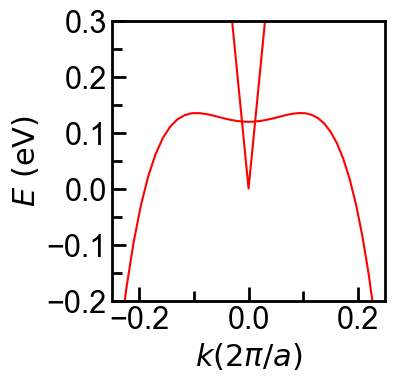

In [22]:
# Define the size of the entire plot
plt.figure(figsize=(12,8))

npoint = 201
eta = linspace(-15, 15, npoint)  

kT = 0.026
alpha = v**2/(4*a)/(kBT)
#e1 = a**2/(4*b)/(kBT)
e1 = -(min(Ekcc) - max(Ekvv))/(kBT)
e0 = 0.135/kBT+e1
eshift =7
eshift1=10
eshift2=5
vF2 = 5.17e+05
vF3 = 1.03e+05
v

# Subplot (a) : Dispersion relation
ax1 = plt.subplot(2,3,1)
ax1.plot(kcc,fc,'r')
ax1.plot(kcc,fv+0.135,'r')
ax1.axis([-0.25,0.25,-0.2,0.3])
ax1.set_xlabel('$k (2\pi/a)$')
ax1.set_ylabel('$E~(\mathrm{eV})$')

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

## Varying Fermi Velocity $v_{F}$

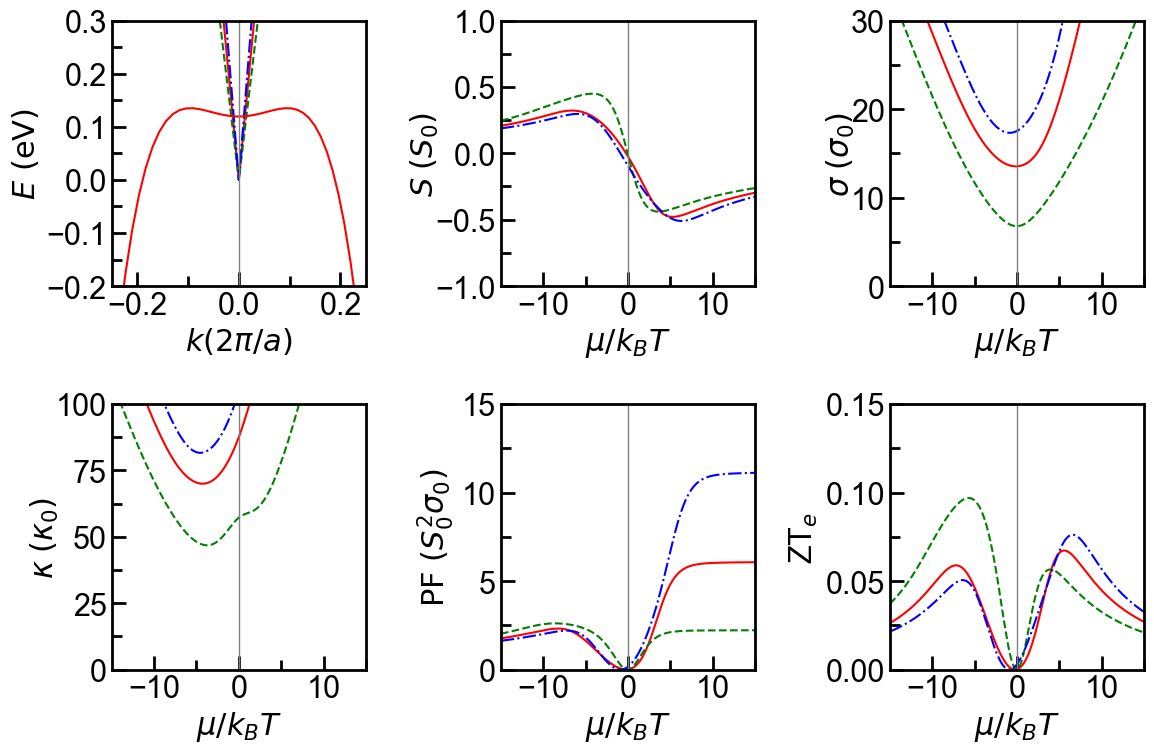

In [23]:
# Define the size of the entire plot
plt.figure(figsize=(12,8))

npoint = 201
eta = linspace(-15, 15, npoint)  

kT = 0.026
alpha = v**2/(4*a)/(kBT)
#e1 = a**2/(4*b)/(kBT)
e1 = -(min(Ekcc) - max(Ekvv))/(kBT)
e0 = 0.135/kBT+e1
eshift =7
eshift1=10
eshift2=5
vF2 = 5.17e+05
vF3 = 1.03e+05

# Subplot (a) : Dispersion relation
ax1 = plt.subplot(2,3,1)
ax1.plot(kcc,fc,color='red',linestyle='solid')
ax1.plot(kcc,fc1,color='green',linestyle='dashed')
ax1.plot(kcc,fc2,color='blue',linestyle='dashdot')
ax1.plot(kcc,fv+0.135,color='red',linestyle='solid')
ax1.axis([-0.25,0.25,-0.2,0.3])
ax1.axvline(0, color='grey', linestyle='-', linewidth=1)
ax1.set_xlabel('$k (2\pi/a)$')
ax1.set_ylabel('$E~(\mathrm{eV})$')
#ax.legend()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

a = 1/(2*0.068)
e0 = 0.26/kBT

# Subplot (b): Seebeck's coefficient
ax2 = plt.subplot(2,3,2)
#ax2.plot(eta, S_c(eta+eshift,e0,e1)/S_0, color='red')
#ax2.plot(eta, S_v(eta+eshift,e0,e1)/S_0, color='green')
ax2.plot(eta, S(eta+eshift,e0,e1,vF1,eff_mass1)/S_0,color='red',linestyle='solid',label='$v_{F1}$')
ax2.plot(eta, S(eta+eshift1,e0,e1,vF2,eff_mass1)/S_0,color='green',linestyle='dashed',label='$v_{F2}$')
ax2.plot(eta, S(eta+eshift2,e0,e1,vF3,eff_mass1)/S_0,color='blue',linestyle='dashdot',label='$v_{F3}$')
ax2.axis([-15,15,-1,1]) # the format is [xmin,xmax,ymin,ymax]
ax2.axvline(0, color='grey', linestyle='-', linewidth=1)
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.labelpad = -4
ax2.set_xlabel('$\mu/k_BT$')
ax2.set_ylabel('$S$ $(S_0)$')
#ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
#ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#Subplot (c) : Electrical conductivity
ax3 = plt.subplot(2,3,3)
#ax3.plot(eta, sigma_c(eta+eshift,e0,e1,vF1)/sigma0,color='red')
#ax3.plot(eta, sigma_v(eta+eshift,e0,e1,eff_mass1)/sigma0,color='green')
ax3.plot(eta, sigma(eta+eshift,e0,e1,vF1,eff_mass1)/sigma0,color='red',linestyle='solid')
ax3.plot(eta, sigma(eta+eshift1,e0,e1,vF2,eff_mass1)/sigma0,color='green',linestyle='dashed')
ax3.plot(eta, sigma(eta+eshift2,e0,e1,vF3,eff_mass1)/sigma0,color='blue',linestyle='dashdot')
ax3.axis([-15,15,0,30]) # the format is [xmin,xmax,ymin,ymax]
ax3.axvline(0, color='grey', linestyle='-', linewidth=1)
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.labelpad = -4
ax3.set_xlabel('$\mu/k_BT$')
ax3.set_ylabel('$\sigma$ $(\sigma_0)$')
#ax3.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
#ax3.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))
ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax3.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax3.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#Subplot (d) : Thermal conductivity
ax4 = plt.subplot(2,3,4)
#ax4.plot(eta, kappa_c(eta+eshift,e0,e1,vF1)/kappa0, 'r--')
#ax4.plot(eta, kappa_v(eta+eshift,e0,e1,eff_mass1)/kappa0, 'g:')
ax4.plot(eta, kappa(eta+eshift,e0,e1,vF1,eff_mass1)/kappa0, color='red',linestyle='solid')
ax4.plot(eta, kappa(eta+eshift1,e0,e1,vF2,eff_mass1)/kappa0, color='green',linestyle='dashed')
ax4.plot(eta, kappa(eta+eshift2,e0,e1,vF3,eff_mass1)/kappa0, color='blue',linestyle='dashdot')
ax4.axis([-15,15,0,100]) # the format is [xmin,xmax,ymin,ymax]
ax4.axvline(0, color='grey', linestyle='-', linewidth=1)
ax4.xaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.labelpad = -4
ax4.set_xlabel('$\mu/k_BT$')
ax4.set_ylabel('$\kappa$ $(\kappa_0)$')
#ax4.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
#ax4.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax4.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax4.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax4.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax4.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#Subplot (e) : Power Factor
ax5 = plt.subplot(2,3,5)
ax5.plot(eta, PF(eta+eshift,e0,e1,vF1,eff_mass1)/(S_0**2*sigma0),color='red',linestyle='solid')
ax5.plot(eta, PF(eta+eshift1,e0,e1,vF2,eff_mass1)/(S_0**2*sigma0),color='green',linestyle='dashed')
ax5.plot(eta, PF(eta+eshift2,e0,e1,vF3,eff_mass1)/(S_0**2*sigma0),color='blue',linestyle='dashdot')
ax5.axis([-15,15,0,15]) # the format is [xmin,xmax,ymin,ymax]
ax5.axvline(0, color='grey', linestyle='-', linewidth=1)
ax5.xaxis.set_minor_locator(AutoMinorLocator(2))
ax5.yaxis.set_minor_locator(AutoMinorLocator(2))
ax5.yaxis.labelpad = 4
ax5.set_xlabel('$\mu/k_BT$')
ax5.set_ylabel('$\mathrm{PF}~(S_0^2 \sigma_0)$')
#ax5.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
#ax5.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax5.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax5.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax5.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax5.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#Subplot (f) : ZT
ax6 = plt.subplot(2,3,6)
ax6.plot(eta, ZT(eta+eshift,e0,e1,vF1,eff_mass1)*T, color='red',linestyle='solid')
ax6.plot(eta, ZT(eta+eshift1,e0,e1,vF2,eff_mass1)*T, color='green',linestyle='dashed')
ax6.plot(eta, ZT(eta+eshift2,e0,e1,vF3,eff_mass1)*T, color='blue',linestyle='dashdot')
ax6.axis([-15,15,0,0.15]) # the format is [xmin,xmax,ymin,ymax]
ax6.axvline(0, color='grey', linestyle='-', linewidth=1)
ax6.xaxis.set_minor_locator(AutoMinorLocator(2))
ax6.yaxis.set_minor_locator(AutoMinorLocator(2))
ax6.yaxis.labelpad = 4
ax6.set_xlabel('$\mu/k_BT$')
ax6.set_ylabel('ZT$_{e}$')
#ax6.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.25))
#ax6.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.125))
ax6.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax6.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax6.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax6.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

plt.tight_layout()
#plt.savefig('2BM_TypeII(velocity).pdf')


$S_{0} = 86.17 \,\, \mathrm{\mu}\mathrm{V}/\mathrm{K}$

$\sigma_{0} = 3.364 \times 10^{3} \,\, \mathrm{S}/ \mathrm{m}$

$\kappa_{0} = 0.0074948790699709425 \,\, \mathrm{W}/\mathrm{m} \cdot \mathrm{K}$

## Varying Effective Mass $m$

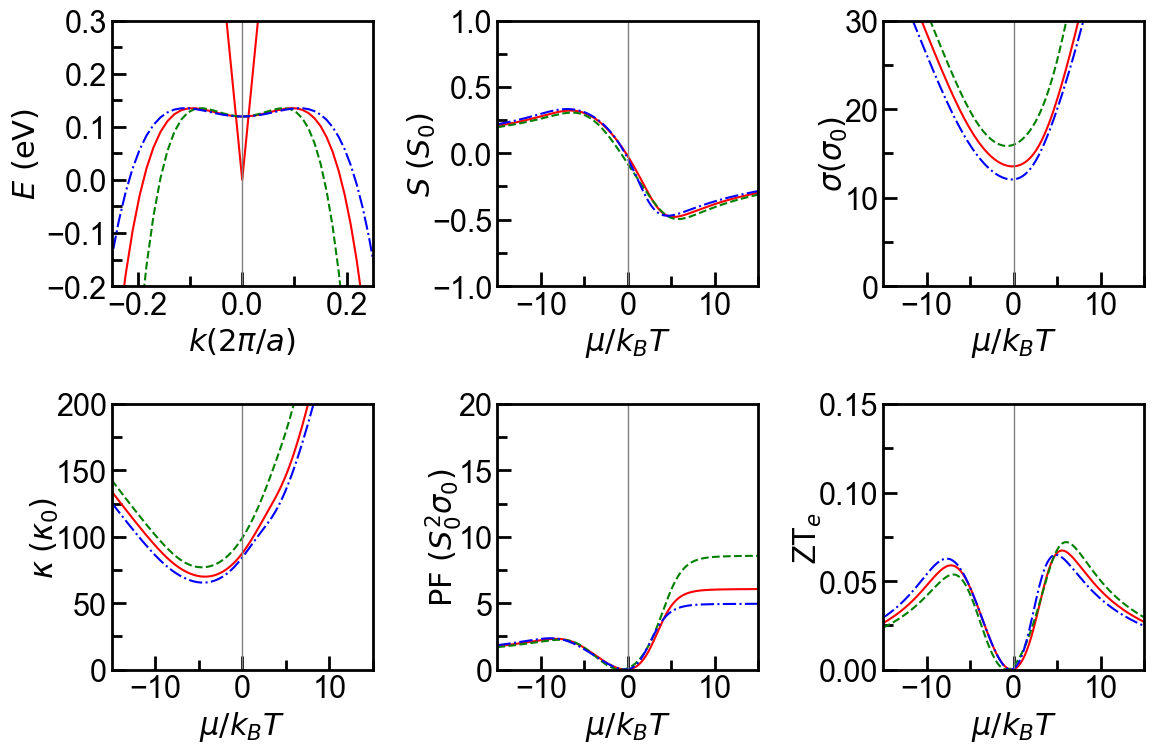

In [24]:
plt.figure(figsize=(12,8))

eff_mass2= 0.2*m0*10**(6)
eff_mass3= 0.6*m0*10**(6)
eshiftm1=7
eshiftm2=6
eshiftm3=8

# Subplot (a) : Dispersion relation
ax1 = plt.subplot(2,3,1)
ax1.plot(kcc,fc,color='red',linestyle='solid')
ax1.plot(kcc,fv+0.135,color='red',linestyle='solid')
ax1.plot(kcc,fv1+0.135,color='green',linestyle='dashed')
ax1.plot(kcc,fv2+0.135,color='blue',linestyle='dashdot')
ax1.axis([-0.25,0.25,-0.2,0.3])
ax1.axvline(0, color='grey', linestyle='-', linewidth=1)
ax1.set_xlabel('$k (2\pi/a)$')
ax1.set_ylabel('$E~(\mathrm{eV})$')
#ax1.legend()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(b) Seebeck coefficient
ax2 = plt.subplot(2,3,2)
ax2.plot(eta, S(eta+eshiftm1,e0,e1,vF1,eff_mass1)/S_0,color='red',linestyle='solid')
ax2.plot(eta, S(eta+eshiftm2,e0,e1,vF1,eff_mass2)/S_0,color='green',linestyle='dashed')
ax2.plot(eta, S(eta+eshiftm3,e0,e1,vF1,eff_mass3)/S_0,color='blue',linestyle='dashdot')
ax2.axis([-15,15,-1,1])
ax2.axvline(0, color='grey', linestyle='-', linewidth=1)
ax2.set_xlabel('$\mu/k_BT$')
ax2.set_ylabel('$S$ $(S_0)$')
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.labelpad = -4
#ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
#ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(c) Electrical conductivity
ax3=plt.subplot(2,3,3)
ax3.plot(eta, sigma(eta+eshiftm1,e0,e1,vF1,eff_mass1)/sigma0, color='red',linestyle='solid',label='$m_{1}$')
ax3.plot(eta, sigma(eta+eshiftm2,e0,e1,vF1,eff_mass2)/Sigma0v(eff_mass2), color='green',linestyle='dashed',label='$m_{2}$')
ax3.plot(eta, sigma(eta+eshiftm3,e0,e1,vF1,eff_mass3)/Sigma0v(eff_mass3), color='blue',linestyle='dashdot',label='$m_{3}$')
ax3.axis([-15,15,0, 30])
ax3.axvline(0, color='grey', linestyle='-', linewidth=1)
ax3.set_xlabel('$\mu/k_BT$')
ax3.set_ylabel('$\sigma (\sigma_0)$')
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.labelpad = -4
ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax3.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax3.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(d) Thermal conductivity
ax4 = plt.subplot(2,3,4)
ax4.plot(eta, kappa(eta+eshiftm1,e0,e1,vF1,eff_mass1)/kappa0,color='red',linestyle='solid')
ax4.plot(eta, kappa(eta+eshiftm2,e0,e1,vF1,eff_mass2)/Kappa0v(eff_mass2), color='green',linestyle='dashed')
ax4.plot(eta, kappa(eta+eshiftm3,e0,e1,vF1,eff_mass3)/Kappa0v(eff_mass3), color='blue',linestyle='dashdot')
ax4.axis([-15,15,0,200]) # the format is [xmin,xmax,ymin,ymax]
ax4.axvline(0, color='grey', linestyle='-', linewidth=1)
ax4.xaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.labelpad = -4
ax4.set_xlabel('$\mu/k_BT$')
ax4.set_ylabel('$\kappa$ $(\kappa_0)$')
#ax4.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
#ax4.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax4.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax4.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax4.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax4.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(e) Power Factor
ax5 = plt.subplot(2,3,5)
#ax5.plot(eta, PF(eta+eshift,e0)/sigma0, linestyle='solid', color ='magenta')
ax5.plot(eta, PF(eta+eshiftm1,e0,e1,vF1,eff_mass1)/(S_0**2*sigma0),linestyle='solid',color ='red')
ax5.plot(eta, PF(eta+eshiftm2,e0,e1,vF1,eff_mass2)/(S_0**2*Sigma0v(eff_mass2)), linestyle='dashed',color ='green')
ax5.plot(eta, PF(eta+eshiftm3,e0,e1,vF1,eff_mass3)/(S_0**2*Sigma0v(eff_mass3)), linestyle='dashdot',color ='blue')
ax5.axis([-15,15,0,20]) # the format is [xmin,xmax,ymin,ymax]
ax5.axvline(0, color='grey', linestyle='-', linewidth=1)
ax5.xaxis.set_minor_locator(AutoMinorLocator(2))
ax5.yaxis.set_minor_locator(AutoMinorLocator(2))
ax5.yaxis.labelpad = -4
ax5.set_xlabel('$\mu/k_BT$')
ax5.set_ylabel('$\mathrm{PF}~(S_0^2 \sigma_0)$')
#ax5.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1*1e-5))
#ax5.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax5.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax5.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax5.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax5.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#(f) ZT
ax6 = plt.subplot(2,3,6)
ax6.plot(eta, ZT(eta+eshiftm1,e0,e1,vF1,eff_mass1)*T,color='red',linestyle='solid')
ax6.plot(eta, ZT(eta+eshiftm2,e0,e1,vF1,eff_mass2)*T,color='green',linestyle='dashed')
ax6.plot(eta, ZT(eta+eshiftm3,e0,e1,vF1,eff_mass3)*T,color='blue',linestyle='dashdot')
ax6.axis([-15,15,0,0.15]) # the format is [xmin,xmax,ymin,ymax]
ax6.axvline(0, color='grey', linestyle='-', linewidth=1)
ax6.xaxis.set_minor_locator(AutoMinorLocator(2))
ax6.yaxis.set_minor_locator(AutoMinorLocator(2))
ax6.yaxis.labelpad = -4
ax6.set_xlabel('$\mu/k_BT$')
ax6.set_ylabel('ZT$_{e}$')
#ax6.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.010))
#ax6.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax6.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax6.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax6.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax6.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')


plt.tight_layout()
#plt.savefig('2BM_TypeII(mass).pdf')